## 중간시험

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. 30세 이하의 인구 비율이 가장 높은 도시 5개

In [3]:
df = pd.read_csv('age.csv', encoding='cp949', index_col=0)
age30 = df.iloc[:, 2:33].replace(',', '', regex=True)
age30 = age30.fillna(0)
age30 = age30.astype('int32')
age30.head(2)

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,...,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세
행정구역,,,,,,,,,,,,,,,,,,,,,
서울특별시 (1100000000),53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,...,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177
서울특별시 종로구 (1111000000),593,683,775,874,852,863,1023,904,1012,923,...,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206


In [9]:
age30_sum = np.sum(age30, axis=1)
총인구수 = np.sum(df.iloc[:, 0].replace(',', '', regex=True).astype('int'), axis=0)
비율 = age30_sum / 총인구수
y = 비율.sort_values(ascending=False)[:5]
y

행정구역
경기도  (4100000000)      0.027294
서울특별시  (1100000000)    0.019046
경상남도  (4800000000)     0.006460
부산광역시  (2600000000)    0.006226
인천광역시  (2800000000)    0.005992
dtype: float64

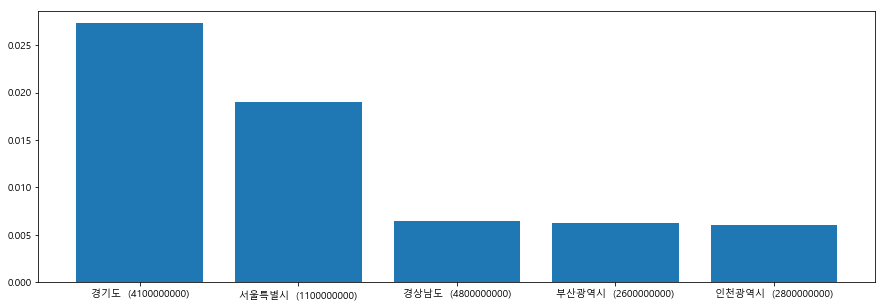

In [10]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 5))
plt.bar(y.index, y)
plt.show()

### 2. 선릉역과 삼성역에서 아침 8~9시에 하차하는 인구수의 합을 구하세요.

In [80]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=3, encoding='cp949', index_col=3, skiprows=1)
subway = df.replace(',', '', regex=True).iloc[:,3:-1]
subway = subway.astype('int32')
subway.head(3)

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,1148,21,11958,10579,15684,61286,44585,115354,89357,238583,...,37939,22083,4127,7762,3,548,0,0,0,0
시청,89,5,2843,4674,4169,24963,8926,74288,11999,207024,...,14946,4767,931,1426,1,25,0,0,0,0
종각,116,3,4576,5233,4780,33366,7695,108663,12735,295205,...,48067,5882,3973,1565,1,1,0,0,0,0


In [81]:
선릉역8시 = subway.loc['선릉'].iloc[:, 10]
삼성역8시 = subway.loc['삼성(무역센터)'].iloc[10]
합계 = np.sum(선릉역8시, axis=0) + np.sum(삼성역8시, axis=0)
print('아침 8시 선릉역과 삼성역의 하차 인원 합계 =', 합계)

아침 8시 선릉역과 삼성역의 하차 인원 합계 = 77982


### 3. 시간대별로 삼성역과 선릉역의 지하철 승하차 현황을 그래프로 표현하세요.

In [82]:
선릉역 = np.sum(subway.loc['선릉'])
선릉역승차 = 선릉역.iloc[::2]
선릉역하차 = 선릉역.iloc[1::2]
삼성역 = subway.loc['삼성(무역센터)']
삼성역승차 = 삼성역.iloc[::2]
삼성역하차 = 삼성역.iloc[1::2]

In [83]:
xtick_val = list(range(25))
xtick_str = []
for i in range(4, 25):
    xtick_str.append(str(i) + '시')
xtick_str = xtick_str + ['0시', '1시', '2시', '3시']

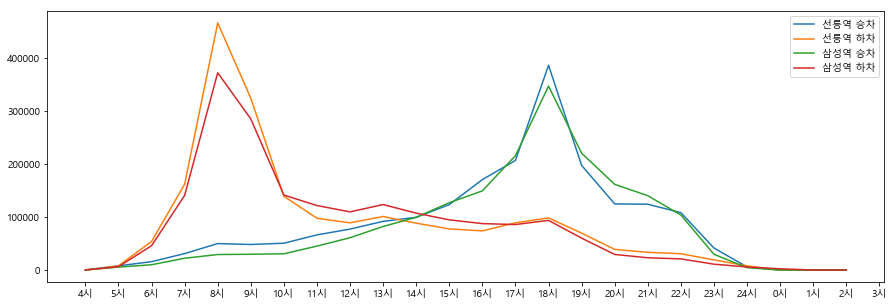

In [84]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 5))
plt.xticks(ticks=xtick_val, labels=xtick_str)
plt.plot(선릉역승차.values, label='선릉역 승차')
plt.plot(선릉역하차.values, label='선릉역 하차')
plt.plot(삼성역승차.values, label='삼성역 승차')
plt.plot(삼성역하차.values, label='삼성역 하차')
plt.legend()
plt.show()

### 4. 유임 승차에 비해 무임 승차 인원의 비율이 높은 지하철역 5개의 이름과 비율을 그래프로 나타내세요.

In [85]:
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls', sheet_name=2, encoding='cp949', index_col=3, skiprows=0)
subway = df.iloc[:, 3:-1]
subway = subway.replace(',', '', regex=True)
subway = subway.astype('int')
subway.head(2)

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,1568570,1489737,247801,242107
시청,709821,727110,112279,112016


In [86]:
유임승차 = subway['유임승차']
무임승차 = subway['무임승차']
비율 = 무임승차 / 유임승차
비율.head(2)

지하철역
서울역    0.157979
시청     0.158179
dtype: float64

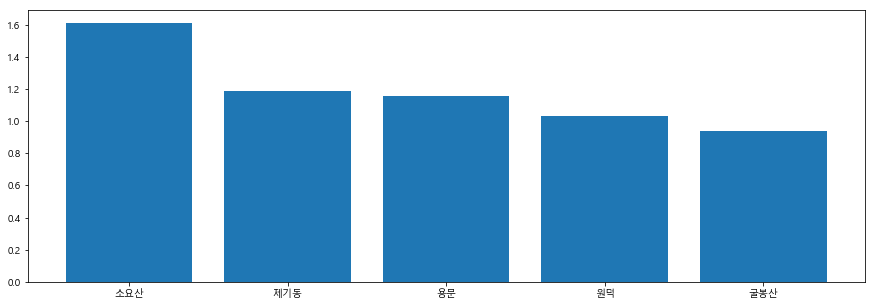

In [87]:
y = 비율.sort_values(ascending=False)[:5]

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 5))
plt.bar(y.index, y)
plt.show()

### 5. 네이버 금융/국내 증시/시가총액/코스피 에서 상위 종목 50개 데이터를 획득합니다. 오전 9시이후에 나타납니다
(현재는 1. 삼성전자 2. SK 하이닉스 3.삼성전자우 4.현대차 5. 셀트리온 순서입니다)<BR>
데이터를 획득하고 5~8행 등을 살펴 보면 NaN 행이 여럿 들어가 있습니다. <BR>
이렇게 잘못된 데이터(NaN)를 모두 제거하고 종목명을 index로 해서 화면에 데이터를 출력하세요.<BR>
힌트 : dropna() 함수는 NaN 하나만 있어도 그 행을 모두 지워버립니다.

In [88]:
url = 'https://finance.naver.com/sise/sise_market_sum.nhn'
df = pd.read_html(url, index_col=1, encoding='cp949')
len(df)

3

In [89]:
df[1].head()

,N,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실
종목명,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
삼성전자,1.0,45700.0,100.0,+0.22%,100.0,2728191.0,5969783.0,57.15,3149617.0,7.59,19.63,NaN
SK하이닉스,2.0,68900.0,2200.0,+3.30%,5000.0,501594.0,728002.0,50.20,2512405.0,3.23,38.53,NaN
삼성전자우,3.0,37550.0,100.0,+0.27%,100.0,308994.0,822887.0,92.65,148080.0,6.23,NaN,NaN
현대차,4.0,141000.0,500.0,-0.35%,5000.0,301272.0,213668.0,44.37,64838.0,26.35,2.20,NaN


In [90]:
코스피 = df[1].iloc[:, 1:]
코스피 = 코스피.dropna(how='all')
코스피 = 코스피.fillna(0)
코스피

,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실
종목명,,,,,,,,,,,
삼성전자,45700.0,100.0,+0.22%,100.0,2728191.0,5969783.0,57.15,3149617.0,7.59,19.63,0.0
SK하이닉스,68900.0,2200.0,+3.30%,5000.0,501594.0,728002.0,50.20,2512405.0,3.23,38.53,0.0
삼성전자우,37550.0,100.0,+0.27%,100.0,308994.0,822887.0,92.65,148080.0,6.23,0.00,0.0
현대차,141000.0,500.0,-0.35%,5000.0,301272.0,213668.0,44.37,64838.0,26.35,2.20,0.0
셀트리온,208000.0,0.0,0.00%,1000.0,266924.0,128329.0,21.16,91244.0,101.51,10.84,0.0
LG화학,348500.0,3500.0,-0.99%,5000.0,246014.0,70592.0,38.81,28885.0,18.53,8.86,0.0
현대모비스,233000.0,1000.0,+0.43%,5000.0,222065.0,95307.0,47.89,63927.0,12.01,6.30,0.0
POSCO,243000.0,2000.0,-0.82%,5000.0,211864.0,87187.0,54.11,37406.0,12.53,3.88,0.0
신한지주,44450.0,500.0,-1.11%,5000.0,210782.0,474200.0,67.35,373237.0,6.68,9.21,0.0


In [91]:
시가총액_상위5 = 코스피.iloc[:, 5].sort_values(ascending=False)[:5]

종목명
삼성전자      5969783.0
삼성전자우      822887.0
SK하이닉스     728002.0
우리금융지주     680164.0
미래에셋대우     658316.0
Name: 상장주식수, dtype: float64

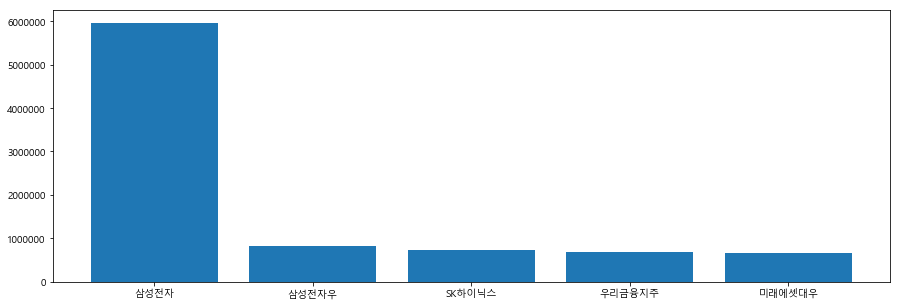

In [100]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 5))
plt.bar(시가총액_상위5.index, 시가총액_상위5)
plt.show()

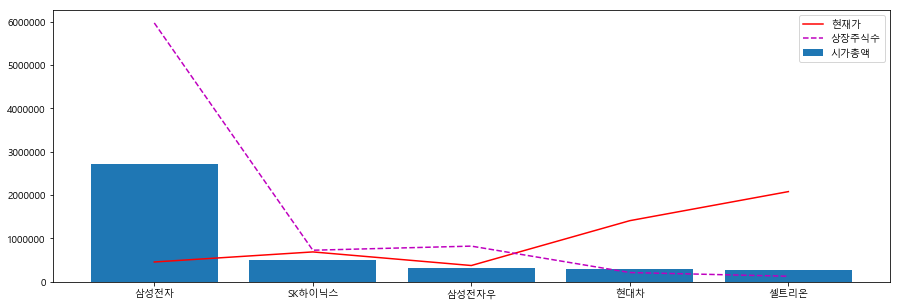

In [129]:
y = 코스피.sort_values(by='시가총액', ascending=False)[:5]
현재가 = y.iloc[:, 0] * 10
주식수 = y.iloc[:, 5]

plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(15, 5))
plt.bar(y.index, y.iloc[:, 4], label='시가총액')
plt.plot(현재가, color='red', label='현재가')
plt.plot(주식수, 'm--', label='상장주식수')
plt.legend()
plt.show()